<a href="https://colab.research.google.com/github/ameer-fice/intel-oneapi/blob/main/MNIST_Streamlit_Canvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


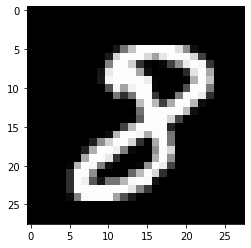

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1214],cmap = 'gray')
plt.show()

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
# from keras.layers import Dense
# from keras.layers import Flatten
model = keras.Sequential()
model.add(keras.layers.Flatten()) # Input Layer
model.add(keras.layers.Dense(512,input_shape=x_train.shape[1:],activation = 'relu'))
model.add(keras.layers.Dense(10,activation ='softmax'))

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(x_train,y_train,epochs = 1)
# Batch-size = 32

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1998 - accuracy: 0.9410


In [7]:
y_pred = model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

In [8]:
import numpy as np
np.argmax(model.predict(x_test), axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [9]:
y_test # Real output

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[ 965,    0,    8,    0,    1,    3,    4,    0,    3,    3],
       [   0, 1125,    5,    0,    0,    1,    3,    6,    0,    7],
       [   0,    1,  969,    2,    4,    0,    0,    9,    1,    0],
       [   3,    2,   18,  991,    1,   10,    1,    6,    9,    9],
       [   0,    0,    2,    0,  957,    1,    3,    4,    3,   14],
       [   3,    0,    2,    6,    0,  866,    7,    0,    7,    8],
       [   4,    2,    4,    1,    6,    6,  937,    0,    4,    1],
       [   1,    0,    7,    3,    0,    0,    0,  983,    2,    5],
       [   2,    5,   17,    5,    3,    4,    3,    3,  942,    0],
       [   2,    0,    0,    2,   10,    1,    0,   17,    3,  962]])

In [11]:
accuracy_score(y_pred,y_test)

0.9697

In [12]:
# We will store the NN Model in a file.
# .h5 file format 

model.save('model_digit.hdf5')

In [13]:
!pip install streamlit==0.83.0 --quiet
!pip install pyngrok==4.1.1 --quiet
!pip install streamlit-drawable-canvas --quiet
from pyngrok import ngrok

     |████████████████████████████████| 7.7 MB 5.2 MB/s 
     |████████████████████████████████| 75 kB 2.8 MB/s 
     |████████████████████████████████| 4.2 MB 26.0 MB/s 
     |████████████████████████████████| 177 kB 68.1 MB/s 
     |████████████████████████████████| 111 kB 72.6 MB/s 
     |████████████████████████████████| 122 kB 62.3 MB/s 
     |████████████████████████████████| 786 kB 46.3 MB/s 
     |████████████████████████████████| 368 kB 70.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.0.3 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.25.0 which is incompatibl

In [16]:
%%writefile app.py
import streamlit as st
import numpy as np
from streamlit_drawable_canvas import st_canvas
from tensorflow import keras
import cv2
model = keras.models.load_model('model_digit.hdf5',compile=False)

SIZE = 225

col1, col2 = st.beta_columns(2)

with col1:
  st.write('Original Image')
  canvas_result = st_canvas(stroke_width=20,stroke_color='#ffffff',
      background_color='#000000',height=SIZE,width=SIZE)

with col2:
  if canvas_result.image_data is not None:
      img = cv2.resize(canvas_result.image_data.astype('uint8'), (28, 28))
      rescaled = cv2.resize(img, (SIZE, SIZE))
      st.write('Rescaled Image')
      st.image(rescaled)

if st.button('Predict'):
    test_x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_x = np.expand_dims(test_x,axis=0)
    val = model.predict(test_x)
    st.title(f'Result: {np.argmax(val[0])}')
    st.bar_chart(val[0])

Overwriting app.py


In [15]:
!nohup streamlit run app.py &

public_url = ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://1871b420f206.ngrok.io
